Running alignment...


<Figure size 1000x600 with 0 Axes>

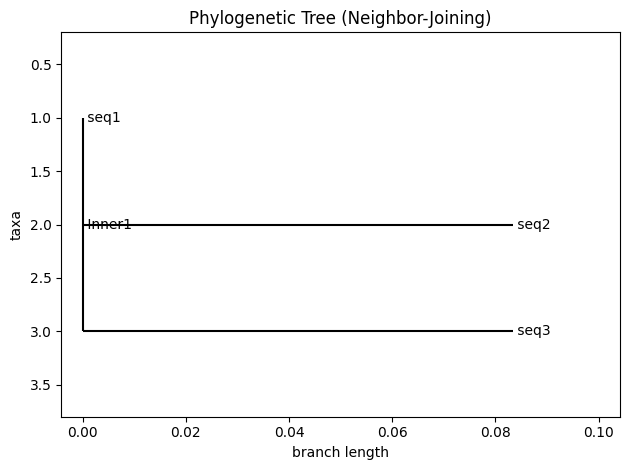

In [2]:
import pandas as pd
from Bio import SeqIO, AlignIO, Phylo
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
import matplotlib.pyplot as plt
import os

# 1. Load your sequences from a DataFrame
# Example: one column with IDs and one with sequences
df = pd.DataFrame({
    "id": ["seq1", "seq2", "seq3"],
    "sequence": ["ATGCGTACGTAG", "ATGCGTACGTAA", "ATGCGTACTTAG"]
})

# 2. Save sequences to FASTA
fasta_file = "input_sequences.fasta"
records = [
    SeqRecord(Seq(seq), id=seq_id, description="")
    for seq_id, seq in zip(df["id"], df["sequence"])
]
SeqIO.write(records, fasta_file, "fasta")

# 3. Run multiple sequence alignment with Clustal Omega
aligned_file = "aligned_sequences.fasta"
clustalomega_cline = ClustalOmegaCommandline(
    infile=fasta_file, outfile=aligned_file, verbose=True, auto=True, force=True
)
print("Running alignment...")
stdout, stderr = clustalomega_cline()

# 4. Read aligned sequences
alignment = AlignIO.read(aligned_file, "fasta")

# 5. Calculate distance matrix and construct tree
calculator = DistanceCalculator("identity")  # You can use "blosum62" for proteins
constructor = DistanceTreeConstructor()

dm = calculator.get_distance(alignment)
tree = constructor.nj(dm)  # Use .upgma(dm) for UPGMA tree

# 6. Plot the tree
plt.figure(figsize=(10, 6))
Phylo.draw(tree, do_show=False, show_confidence=False)
plt.title("Phylogenetic Tree (Neighbor-Joining)")
plt.tight_layout()
plt.show()
